In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [40]:
train_data = '/content/drive/MyDrive/Baitap_AI/khuon_mat/train'
test_data =  '/content/drive/MyDrive/Baitap_AI/khuon_mat/test'
val_data  =  '/content/drive/MyDrive/Baitap_AI/khuon_mat/test'

In [41]:
from keras.engine.data_adapter import train_validation_split

In [42]:
data_scale = ImageDataGenerator(rescale=1. / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_input = data_scale.flow_from_directory(train_data,target_size=(120, 120),batch_size=32,class_mode="categorical")
test_input = data_scale.flow_from_directory(test_data,target_size=(120, 120),batch_size=32,class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,target_size=(120, 120),batch_size=32,class_mode="categorical")

Found 47 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [43]:
class_name = ['Quân', 'Sơn Tùng', 'Hải Tú']

In [44]:
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print("Số người: ",train_input.num_classes)

labels:  ['Quân', 'Sơn Tùng', 'Hải Tú']
match class:  {'Hải Tú': 0, 'Quân Trần': 1, 'Sơn Tùng': 2}
Số người:  3


In [46]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

In [47]:
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(3,activation='softmax'))  
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 30, 30, 64)       

In [48]:
from tensorflow.keras.optimizers import Adam

In [49]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
face_train = model.fit(train_input,batch_size=30,epochs=100,verbose=1,validation_data=val_input)

Epoch 1/100
2/2 [==============================] - 3s 2s/step - loss: 8.0221 - accuracy: 0.2979 - val_loss: 4.8770 - val_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - 2s 1s/step - loss: 12.0950 - accuracy: 0.4043 - val_loss: 1.3756 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 2s 1s/step - loss: 3.1439 - accuracy: 0.5106 - val_loss: 1.2723 - val_accuracy: 0.2917
Epoch 4/100
2/2 [==============================] - 2s 1s/step - loss: 3.7418 - accuracy: 0.4255 - val_loss: 1.1389 - val_accuracy: 0.4167
Epoch 5/100
2/2 [==============================] - 2s 1s/step - loss: 1.7277 - accuracy: 0.3830 - val_loss: 1.1025 - val_accuracy: 0.3750
Epoch 6/100
2/2 [==============================] - 2s 1s/step - loss: 1.2880 - accuracy: 0.3617 - val_loss: 1.0986 - val_accuracy: 0.2917
Epoch 7/100
2/2 [==============================] - 2s 1s/step - loss: 1.0684 - accuracy: 0.4043 - val_loss: 1.0981 - val_accuracy: 0.3333
Epoch 8/100
2/2 [================

In [51]:
model.save('/content/drive/MyDrive/Baitap_AI/khuon_mat/face.h5')

array([1])

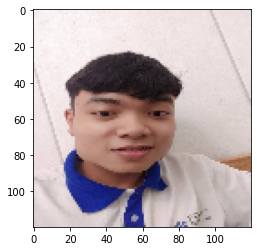

In [52]:
pic = image.load_img('/content/drive/MyDrive/Baitap_AI/khuon_mat/Quan.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

In [53]:
guess=np.argmax(model.predict(pic), axis=1)

In [54]:
if guess[0]==0:
  print("Ten: Hai Tu")
if guess[0]==1:
  print("Ten: Quan ")
if guess[0]==2:
  print("Ten: Son Tung")

Ten: Quan 
